# Week 4

# Lecture 8 - Implementing Backpropagation

Below, we implement a fully-connected feedforward neural network with random weight initialization, customizable architecture, and gradient descent with use of backpropagation for computing the gradients. We will then test it on some examples.

The best way to understand how this all works is to actually implement it with minimal external libraries. One exception is `NumPy`, which at least automates some of the basic mathematical operations we need to do.

In [3]:
import numpy as np

Next, we will implement the feedforward neural network. The code is partly based on an implementation from *Deep Learning for Computer Vision with Python* by Adrian Rosebrock.

In [4]:
class FeedforwardNeuralNetwork:
    
    # input a vector [a, b, c, ...] with the number of nodes in each layer
    def __init__(self, layers, alpha = 0.1):
        
        # list of weight matrices between layers
        self.W = []
        
        # network architecture will be a vector of numbers of nodes for each layer
        self.layers = layers
        
        # learning rate
        self.alpha = alpha
        
        # initialize the weights (randomly) -- this is our initial guess for gradient descent
        
        # initialize the weights between layers (up to the next-to-last one) as normal random variables
        for i in np.arange(0, len(layers) - 2):
            self.W.append(np.random.randn(layers[i] + 1, layers[i + 1] + 1))
            
        # initialize weights between the last two layers (we don't want bias for the last one)
        self.W.append(np.random.randn(layers[-2] + 1, layers[-1]))
        
    # define the sigmoid activation
    def sigmoid(self, x):
        return 1.0 / (1 + np.exp(-x))
    
    # define the sigmoid derivative (where z is the output of a sigmoid)
    def sigmoidDerivative(self, z):
        return z * (1 - z)
    
    # fit the model
    def fit(self, X, y, epochs = 10000, update = 1000):
        # add a column of ones to the end of X
        X = np.hstack((X, np.ones([X.shape[0],1])))

        for epoch in np.arange(0,epochs):

            # feed forward, backprop, and weight update
            for (x, target) in zip(X, y):
                
                # make a list of output activations from the first layer
                # (just the original x values)
                A = [np.atleast_2d(x)]
                
                # feed forward
                for layer in np.arange(0, len(self.W)):
                    
                    # feed through one layer and apply sigmoid activation
                    net = A[layer].dot(self.W[layer])
                    out = self.sigmoid(net)
                    
                    # add our network output to the list of activations
                    A.append(out)
                    
                # backpropagation
                error = A[-1] - target
                
                # term proportional to the gradient
                D = [error * self.sigmoidDerivative(A[-1])]
                
                # loop backwards over the layers to build up deltas
                for layer in np.arange(len(A) - 2, 0, -1):
                    delta = D[-1].dot(self.W[layer].T)
                    delta = delta * self.sigmoidDerivative(A[layer])
                    D.append(delta)
                    
                # reverse the deltas since we looped in reverse
                D = D[::-1]
                
                # weight update
                for layer in np.arange(0, len(self.W)):
                    self.W[layer] -= self.alpha * A[layer].T.dot(D[layer])
                    
            # print a status update
            if (epoch + 1) % update == 0:
                loss = self.computeLoss(X,y)
                print('Epoch =', epoch + 1, 'loss = ', loss)
                
    def predict(self, X, addOnes = True):
        # initialize data, be sure it's the right dimension
        p = np.atleast_2d(X)
        
        # add a column of 1s for bias
        if addOnes:
            p = np.hstack((p, np.ones([X.shape[0],1])))
        
        # feed forward!
        for layer in np.arange(0, len(self.W)):
            p = self.sigmoid(np.dot(p, self.W[layer]))
         
        # return the predictions
        return p
    
    def computeLoss(self, X, y):
        # initialize data, be sure it's the right dimension
        y = np.atleast_2d(y)
        
        # feed the datapoints through the network to get predicted outputs
        predictions = self.predict(X, addOnes = False)
        
        # compute the sum of squared errors loss function
        loss = np.sum((predictions - y)**2) / 2.0
        
        return loss

Let's check the variables of the model.

In [3]:
model = FeedforwardNeuralNetwork([2, 2, 1])
vars(model)

{'W': [array([[ 1.06393045, -0.72605639, -0.15772808],
         [ 1.98450314,  0.87914522, -0.62183604],
         [-0.265093  , -0.00338343, -0.01194419]]),
  array([[-1.41855291],
         [-0.50649455],
         [-0.43374157]])],
 'layers': [2, 2, 1],
 'alpha': 0.1}

## Example: XOR function

Let's run the code to try to learn the exclusive 'or' function, i.e. XOR.

In [7]:
import random

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

model.fit(X,y,50000,1000)

Epoch = 1000 loss =  0.00030659549348088474
Epoch = 2000 loss =  0.00030445567894294464
Epoch = 3000 loss =  0.000302345303558614
Epoch = 4000 loss =  0.00030026376628593666
Epoch = 5000 loss =  0.00029821048229387414
Epoch = 6000 loss =  0.0002961848824202817
Epoch = 7000 loss =  0.0002941864126516504
Epoch = 8000 loss =  0.00029221453362323247
Epoch = 9000 loss =  0.00029026872013894635
Epoch = 10000 loss =  0.00028834846070990643
Epoch = 11000 loss =  0.0002864532571109678
Epoch = 12000 loss =  0.00028458262395422544
Epoch = 13000 loss =  0.00028273608827894406
Epoch = 14000 loss =  0.000280913189157027
Epoch = 15000 loss =  0.0002791134773134332
Epoch = 16000 loss =  0.00027733651476085904
Epoch = 17000 loss =  0.00027558187444799893
Epoch = 18000 loss =  0.00027384913992098474
Epoch = 19000 loss =  0.00027213790499716324
Epoch = 20000 loss =  0.0002704477734509301
Epoch = 21000 loss =  0.0002687783587109968
Epoch = 22000 loss =  0.00026712928356858984
Epoch = 23000 loss =  0.00026

In [8]:
model.predict(X)

array([[0.00251118],
       [0.98844988],
       [0.98857744],
       [0.01362603]])

Note these are very close to 0, 1, 1, 0 -- the correct classifications for the XOR function. This neural net can classify this nonlinear problem of XOR.

## Example: Tiny MNIST

In [5]:
# load some more libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import datasets
from tensorflow.keras.utils import to_categorical

Let's try to classify a tiny version of the MNIST data shrunk down to 8-by-8 pixel images.

In [6]:
### CLASSIFY MNIST PICTURES

# 'digits' is a tiny version of MNIST in sklearn.datasets has only 8 x 8 pixels
# with grayscale values from 0 to 16
digits = datasets.load_digits()
data = digits.data.astype("float")
print("Samples: {}, Dimension: {}".format(data.shape[0], data.shape[1]))

X = data

Y = digits.target

# randomly choose 75% of the data to be the training set and 25% for the testing set
trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.25)

# we need to turn the labels into 1-hot representations
trainY = to_categorical(trainY)
testY = to_categorical(testY)

# fit the model to the training data
model = FeedforwardNeuralNetwork([64, 16, 10])
model.fit(trainX, trainY, 1000, 100)

# print the classification performance
print("Training set accuracy")

predictedY = model.predict(trainX)
predictedY = predictedY.argmax(axis=1)

trainY = trainY.argmax(axis=1)

print(classification_report(trainY, predictedY))

print("Test set accuracy")

predictedY = model.predict(testX)
predictedY = predictedY.argmax(axis=1)

testY = testY.argmax(axis=1)

print(classification_report(testY, predictedY))

Samples: 1797, Dimension: 64
Epoch = 100 loss =  32.0392636346301
Epoch = 200 loss =  16.239469112021837
Epoch = 300 loss =  13.220931252698756
Epoch = 400 loss =  26.186927661632634
Epoch = 500 loss =  10.490969306957378
Epoch = 600 loss =  10.616548138184777
Epoch = 700 loss =  9.87329686035616
Epoch = 800 loss =  8.762272774118959
Epoch = 900 loss =  8.44671478310083
Epoch = 1000 loss =  8.228648669813563
Training set accuracy
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       131
           1       0.97      0.99      0.98       131
           2       1.00      1.00      1.00       136
           3       1.00      0.99      1.00       134
           4       1.00      0.99      0.99       143
           5       0.99      0.99      0.99       129
           6       1.00      1.00      1.00       129
           7       1.00      1.00      1.00       139
           8       0.97      0.98      0.97       138
           9       0.99  

Let's try the same with two hidden layers.

In [11]:
### CLASSIFY MNIST PICTURES

# 'digits' is a tiny version of MNIST in sklearn.datasets has only 8 x 8 pixels
# with grayscale values from 0 to 16
digits = datasets.load_digits()
data = digits.data.astype("float")
print("Samples: {}, Dimension: {}".format(data.shape[0], data.shape[1]))

X = data/16.0

Y = digits.target

# randomly choose 75% of the data to be the training set and 25% for the testing set
trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.25)

# we need to turn the labels into 1-hot representations
trainY = to_categorical(trainY)
testY = to_categorical(testY)

# fit the model to the training data
model = FeedforwardNeuralNetwork([64, 32, 16, 10])
model.fit(trainX, trainY, 1000, 10)

# print the classification performance
print("Training set accuracy")

predictedY = model.predict(trainX)
predictedY = predictedY.argmax(axis=1)

trainY = trainY.argmax(axis=1)

print(classification_report(trainY, predictedY))

print("Test set accuracy")

predictedY = model.predict(testX)
predictedY = predictedY.argmax(axis=1)

testY = testY.argmax(axis=1)

print(classification_report(testY, predictedY))

Samples: 1797, Dimension: 64
Epoch = 10 loss =  87.22375141012986
Epoch = 20 loss =  40.547515868419474
Epoch = 30 loss =  25.745577390954736
Epoch = 40 loss =  18.57644584988658
Epoch = 50 loss =  14.50841094433839
Epoch = 60 loss =  11.874756757511788
Epoch = 70 loss =  9.886762865030889
Epoch = 80 loss =  7.859869991230228
Epoch = 90 loss =  6.069643611056056
Epoch = 100 loss =  4.997895500859883
Epoch = 110 loss =  4.323327346573425
Epoch = 120 loss =  3.8404375994661804
Epoch = 130 loss =  3.466471276221871
Epoch = 140 loss =  3.1563309144822
Epoch = 150 loss =  2.8879149934820614
Epoch = 160 loss =  2.6580414630146496
Epoch = 170 loss =  2.463232762705699
Epoch = 180 loss =  2.279407932477253
Epoch = 190 loss =  2.161583700596291
Epoch = 200 loss =  1.8223863317155309
Epoch = 210 loss =  1.6446449128827656
Epoch = 220 loss =  1.53550015835259
Epoch = 230 loss =  1.4510782335892232
Epoch = 240 loss =  1.381025601895006
Epoch = 250 loss =  1.3210935078750294
Epoch = 260 loss =  1.2

Almost all test images were labeled correctly, 97%! But let's take a look at the ones that were labeled wrong. Most look a bit ambiguous or messy, so it's not that surprising they were not classified correctly.

16
The correct label is 8
The predicted label is 7
167
The correct label is 5
The predicted label is 8
216
The correct label is 9
The predicted label is 8
253
The correct label is 5
The predicted label is 7
268
The correct label is 7
The predicted label is 8
317
The correct label is 6
The predicted label is 1
372
The correct label is 3
The predicted label is 8
398
The correct label is 6
The predicted label is 4
417
The correct label is 8
The predicted label is 4


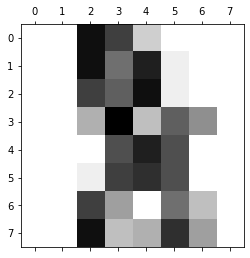

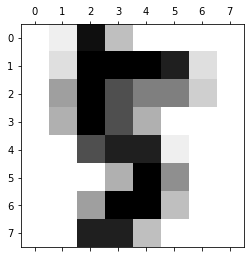

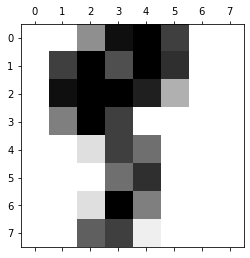

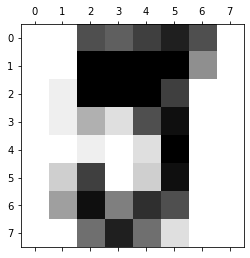

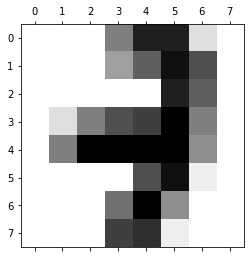

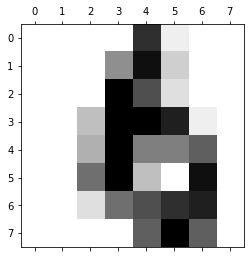

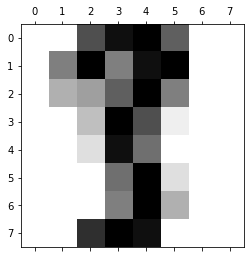

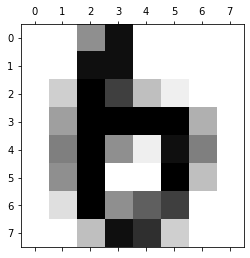

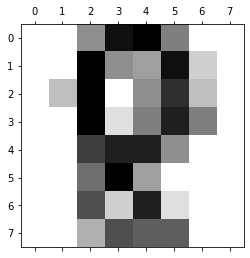

In [12]:
import matplotlib.pyplot as plt

for i in range(testX.shape[0]):
    if testY[i] != predictedY[i]:
        print(i)
        print('The correct label is', testY[i])
        print('The predicted label is', predictedY[i])
        plt.matshow(16*testX[i].reshape(8,8), cmap='gray_r')

Some of these images are really hard to interpret, even as a human, so it is unsurprising the model has trouble with them.

## Example: Full-Size MNIST

Next, let's try to use 1000 images from the full-sized MNIST dataset of 28-by-28 grayscale images.

In [8]:
from tensorflow.keras.datasets import mnist

In [15]:
### CLASSIFY MNIST PICTURES

# create a dataset of 1000 MNIST images, reshaped as single vectors, and labels
data = mnist.load_data()

# The datapoints are in mnistData[0][0]
X = data[0][0][:1000].reshape([1000,28*28])
X = X/255.0

# The labels are in mnistData[0][1]
Y = data[0][1][:1000]

# randomly choose 75% of the data to be the training set and 25% for the testing set
trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.25)

trainY = to_categorical(trainY)
testY = to_categorical(testY)

# fit the model to the training data
model = FeedforwardNeuralNetwork([784, 16, 10], 0.5)
model.fit(trainX, trainY, 1000, 100)

# print the classification performance
print("Training set accuracy")
predictedY = model.predict(trainX)
predictedY = predictedY.argmax(axis=1)

trainY = trainY.argmax(axis=1)
print(classification_report(trainY, predictedY))

print("Test set accuracy")
predictedY = model.predict(testX)
predictedY = predictedY.argmax(axis=1)

testY = testY.argmax(axis=1)
print(classification_report(testY, predictedY))

Epoch = 100 loss =  10.403572633225846
Epoch = 200 loss =  6.643451680640926
Epoch = 300 loss =  6.354496880700732
Epoch = 400 loss =  6.251887744158513
Epoch = 500 loss =  6.194783009785175
Epoch = 600 loss =  6.158131236614045
Epoch = 700 loss =  6.131575350227791
Epoch = 800 loss =  6.113217836747774
Epoch = 900 loss =  6.099208222597442
Epoch = 1000 loss =  6.088216385885412
Training set accuracy
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        70
           1       1.00      0.99      0.99        76
           2       0.99      0.99      0.99        82
           3       0.98      0.95      0.97        64
           4       0.99      0.99      0.99        82
           5       0.96      0.97      0.97        71
           6       0.97      0.99      0.98        73
           7       1.00      1.00      1.00        89
           8       1.00      0.98      0.99        66
           9       0.96      0.99      0.97        77



Here, we have an **overfitting** problem because the training accuracy is good, but test accuracy is significantly worse. This frequently happens when we use a small dataset. In this case, we used only 1000 images, but it still took a several minutes to run. If we used 10000 images, which would be a more ideal dataset, it would take 30-40 minutes!

This is no good... we need stochastic gradient descent to make this more useful on larger datasets.